# RIoT: Reinforced IoT
A Security solution for IoT devices.

IoT devices because of their lack of processing power and storage capabilities, running an anti-virus or any other forms of protection for such devices is very difficult. RIoT aims to solve this problem by having a system which monitors all the packets in the IoT network and by using a machine learning model on the observed packets, determine whether something is off.

The [dataset](https://www.stratosphereips.org/datasets-iot23) used to train the model is created by capuring all the packets involved in IoT system which is deliberately attacked, labelling them and running these packet capture files(.pcap files) through a program called [zeek](https://zeek.org) to finally get a transactional log file to which additional two coloumns are added which denote whether these were part of an attack or not.

The dataset contains following coloumns:<br>
1. ts: Timestamp when this took place(It is in Unix time).<br>
1. uid: An Id to identify a device/user in the communication.<br>
1. id.orig_h: The IP address of the originator of the packet.<br>
1. id.orig_p: The port used in the originator of the packet.<br>
1. id.resp_h: The IP address of the rescipient of the packet.<br>
1. id.resp_p: The port used in the rescipient of the packet.<br>
1. proto: Underlying transport layer protocol used (usually its tcp or udp).<br>
1. service: Identified application protocol(http,dns etc).<br>
1. duration: The duration of connection.<br>
1. orig_bytes: The number of payload bytes the originator sent.<br>
1. resp_bytes: The number of payload bytes the rescipient sent.<br>
1. conn_state: Encoded values which denote the state of connection.<br>
1. local_orig: Boolean value that denotes whether connection originated locally.<br>
1. local_resp: Boolean value that denotes whether connection is responded to locally.<br>
1. missed_bytes: Indicates the number of bytes missed in content gaps, which is representative of packet loss.<br>
1. history: Encodes the state history of connection as a string of letters.<br>
1. orig_pkts: Number of packets that the originator sent.<br>
1. orig_ip_bytes: Number of IP level bytes that the originator sent.<br>
1. resp_pkts: Number of packets that the responder sent.<br>
1. resp_ip_bytes: Number of IP level bytes that the responder sent.<br>

1. label: Labelled as *Malicious* or *benign*<br>
1. Detailed_label: Labels the type of attack.

## Importing required libraries

The following libraries were used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import sklearn as skl

## Loading the data

In [2]:
train_data = pd.read_csv("../EnsembleData.first.csv")

*Process of analysing and cleaning the data:*

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   orig_port      1865 non-null   int64  
 1   resp_port      1865 non-null   int64  
 2   protocol       1865 non-null   object 
 3   service        1865 non-null   object 
 4   duration       1865 non-null   float64
 5   orig_bytes     1865 non-null   int64  
 6   resp_bytes     1865 non-null   int64  
 7   conn_state     1865 non-null   object 
 8   missed_bytes   1865 non-null   int64  
 9   history        1865 non-null   object 
 10  orig_pkts      1865 non-null   int64  
 11  orig_ip_bytes  1865 non-null   int64  
 12  resp_pkts      1865 non-null   int64  
 13  resp_ip_bytes  1865 non-null   int64  
 14  label          1865 non-null   object 
dtypes: float64(1), int64(9), object(5)
memory usage: 218.7+ KB


In [4]:
train_data.head()

,orig_port,resp_port,protocol,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,44115,8080,tcp,http,0.116685,18,339,RSTO,0,ShADadfR,5,286,4,555,Malicious
1,56767,8080,tcp,http,5.075815,18,0,RSTR,0,ShADafr,3,182,4,216,Malicious
2,56769,8080,tcp,http,5.050118,18,0,RSTR,0,ShADafr,3,182,4,216,Malicious
3,56771,8080,tcp,http,5.068854,18,0,RSTR,0,ShADafr,3,182,4,216,Malicious
4,56775,8080,tcp,http,5.058364,18,0,RSTR,0,ShADafr,3,182,4,216,Malicious


In [5]:
train_data.describe()

,orig_port,resp_port,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,1865.000000,1865.000000,1865.000000,1865.000000,1.865000e+03,1865.0,1865.000000,1.865000e+03,1865.000000,1.865000e+03
mean,36895.873995,4909.465952,27.824773,1117.131903,1.833506e+05,0.0,75.219303,5.107636e+03,136.056300,1.910126e+05
std,19599.381480,3733.276856,298.951161,12704.076813,7.792731e+06,0.0,2864.404850,1.521147e+05,5546.168119,8.096162e+06
min,68.000000,53.000000,0.000052,0.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,32810.000000,80.000000,0.098443,18.000000,0.000000e+00,0.0,4.000000,2.340000e+02,1.000000,9.000000e+01
50%,41365.000000,8080.000000,0.357294,18.000000,1.060000e+02,0.0,5.000000,2.860000e+02,4.000000,2.160000e+02
75%,52263.000000,8080.000000,5.058119,157.000000,1.630000e+02,0.0,5.000000,4.060000e+02,5.000000,4.120000e+02
max,64769.000000,8080.000000,11851.214389,454656.000000,3.365164e+08,0.0,123657.000000,6.527241e+06,239484.000000,3.496187e+08


## Data Analysis
Following is the data visualisations done as part of the data cleaning process.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'port of Originator')

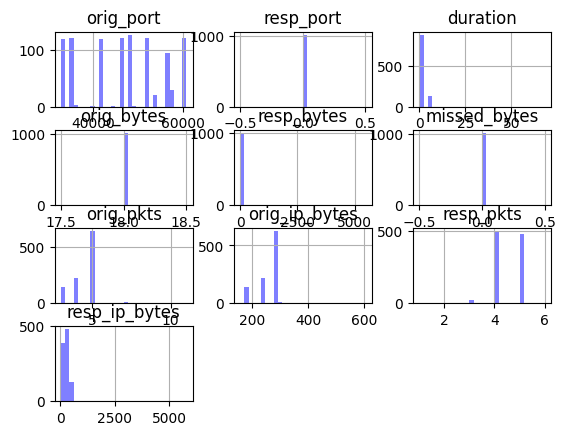

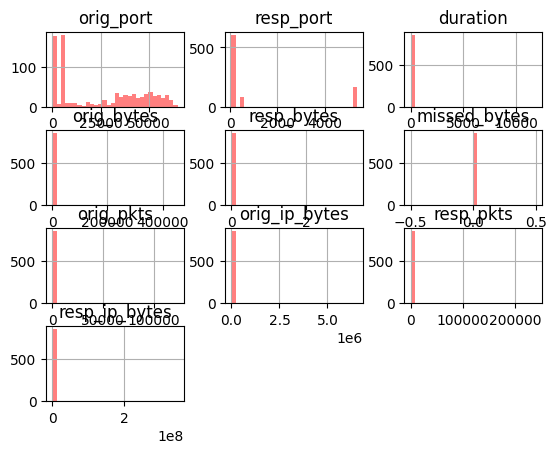

In [6]:
train_data.loc[train_data["label"]=="Malicious"].hist(alpha=0.5,color='blue',bins=30,label='label="Malicious"')

train_data.loc[train_data['label']=="benign"].hist(alpha=0.5,color='red',bins=30,label='label="Benign"')
plt.legend()
plt.xlabel('port of Originator')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'port of Responder')

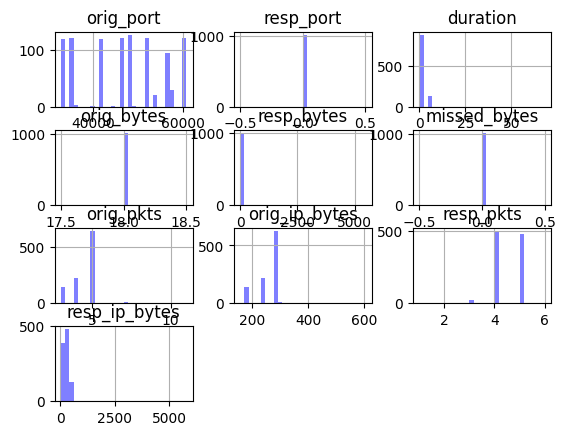

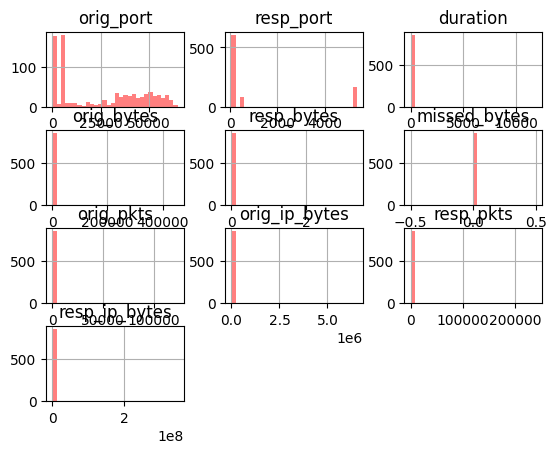

In [7]:
train_data.loc[train_data['label']=="Malicious"].hist(alpha=0.5,color='blue',bins=30,label='label="Malicous"')

train_data.loc[train_data['label']=="benign"].hist(alpha=0.5,color='red',bins=30,label='label="Benign"')
plt.legend()
plt.xlabel('port of Responder')

*Encoding the values of Categorical coloumn for ML algorithm*


In [8]:
# Encoding the 'label' coloumn of dataset

newLabel = []
for i in train_data['label']:
    if i == 'Malicious':
        newLabel.append(1)
    else:
        newLabel.append(0)

train_data = train_data.drop('label',axis=1)
train_data['label'] = newLabel

# Encoding the 'proto' coloumn of dataset
# Program comes here
# tcp:0 udp:1 icmp:2
newProtoColoumn = []
for i in train_data['protocol']:
    if i == 'tcp':
        newProtoColoumn.append(0)
    elif i == 'udp':
        newProtoColoumn.append(1)
    else:
        newProtoColoumn.append(2)

train_data = train_data.drop('protocol',axis=1)
train_data['protocol'] = newProtoColoumn

# Encoding the 'service' coloumn of dataset
# Program comes here
# Not encoding service coloumn as there is a lot of blank spaces in that coloumn in dataset/
train_data = train_data.drop('service',axis=1)

# Encoding the 'conn_state' coloumn of dataset.
# Program comes here
def conn_state_encoder(conn_state_value):
    if type(conn_state_value)!=str:
        return None
    
    if conn_state_value == "S0": # Connection attempt seen,no reply.
        return 0
    elif conn_state_value == "S1": # Connection established, not terminated.
        return 1
    elif conn_state_value == "SF": # Normal establishment and termination.
        return 2
    elif conn_state_value == "REJ": # Connection attempt rejected.
        return 3
    elif conn_state_value == "S2": # Connection established and close attempt by originator seen(but no reply from responder).
        return 4
    elif conn_state_value == "S3": # Connection established and close attempt by responder seen(but no reply from originator).
        return 5
    elif conn_state_value == "RSTO": # Connection established, originator aborted(sent a RST).
        return 6
    elif conn_state_value == "RSTR": # Responder sent a RST.
        return 7
    elif conn_state_value == "RSTOS0": # Originator sent a SYN followed by a RST, never saw a SYN-ACK from responder.
        return 8
    elif conn_state_value == "RSTRH": # Responder sent a SYN-ACK followed by a RST, never saw a SYN from (supposed) originator.
        return 9
    elif conn_state_value == "SH": # Originator sent a SYN followed by a FIN, never saw a SYN-ACK from the responder(half open connection).
        return 10
    elif conn_state_value == "SHR": # Responder sent a SYN-ACK followed by a FIN, never saw a SYN from originator.
        return 11
    elif conn_state_value == "OTH": # No SYN seen, just midstream traffic(eg: partial traffic that was not later closed).
        return 12

newConn_state = []
for i in train_data['conn_state']:
    newConn_state.append(conn_state_encoder(i))
train_data = train_data.drop('conn_state',axis=1)
train_data['conn_state'] = newConn_state

# Encoding the 'history' coloumn of dataset
# Decoding function
def DecimalToBase25(decimalNum):
    base25Str=""
    decodings = {1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'a',11:'b',12:'c',13:'d',14:'e',15:'f',16:'g',17:'h',18:'i',19:'j',20:'k',21:'l',22:'m',23:'n',24:'o',0:'p'}

    while decimalNum != 0 :
        base25Str = base25Str + decodings[decimalNum%25]
        if decimalNum%25 == 0:  # For a weird edge case when '^' comes in history string...
            decimalNum=decimalNum-1
        decimalNum = decimalNum//25

    base25Str = base25Str[::-1]
    #print("decoded Base 25 Value:",base25Str)
    return base25Str

def decodeHist(encodedDecimalVal):
    if type(encodedDecimalVal) != int:
        return None
    
    decodings = {'1':'s','2':'S','3':'d','4':'D','5':'f','6':'F','7':'h','8':'H','9':'r','a':'R','b':'c','c':'C','d':'a','e':'A','f':'g','g':'G','h':'t','i':'T','j':'w','k':'W','l':'i','m':'I','n':'q','o':'Q','p':'^'}
    base25DecodedStr = DecimalToBase25(encodedDecimalVal)
    decodedHistStr=''

    for i in base25DecodedStr:
        decodedHistStr = decodedHistStr + decodings[i]

    #print("History value decoded by function: ",decodedHistStr)

# Encoding functions:
def base25ToDecimal(base25Encoded):
    if type(base25Encoded) != str:
        return None
    decimalVal = 0

    encodings = {'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'a':10,'b':11,'c':12,'d':13,'e':14,'f':15,'g':16,'h':17,'i':18,'j':19,'k':20,'l':21,'m':22,'n':23,'o':24,'p':25}

    for i in base25Encoded:
       decimalVal =  decimalVal * 25 + encodings[i]

    #print("encoded value in decimal: ",decimalVal)
    return decimalVal

def encodeHist(history):
    #print(history)
    if type(history) != str :
        return None

    encodedStr = ""

    encoding = {'s':'1','S':'2','d':'3','D':'4','f':'5','F':'6','h':'7','H':'8','r':'9','R':'a','c':'b','C':'c','a':'d','A':'e','g':'f','G':'g','t':'h','T':'i','w':'j','W':'k','i':'l','I':'m','q':'n','Q':'o','^':'p'}

    for i in history :
        encodedStr = encodedStr + encoding[i]

    encodedDecimalVal = base25ToDecimal(encodedStr)

    #print("encoded value in base 25: ",encodedStr)
    decodeHist(encodedDecimalVal)
    #print('\n')
    return encodedStr

# encoding the history coloumn of train dataset
encodedHist = []
for i in train_data['history']:
    encodedHist.append(encodeHist(i))

train_data['encodedHistory'] = encodedHist
train_data = train_data.drop('history',axis=1)

In [9]:
train_data

,orig_port,resp_port,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,protocol,conn_state,encodedHistory
0,44115,8080,0.116685,18,339,0,5,286,4,555,1,0,6,27e4d35a
1,56767,8080,5.075815,18,0,0,3,182,4,216,1,0,7,27e4d59
2,56769,8080,5.050118,18,0,0,3,182,4,216,1,0,7,27e4d59
3,56771,8080,5.068854,18,0,0,3,182,4,216,1,0,7,27e4d59
4,56775,8080,5.058364,18,0,0,3,182,4,216,1,0,7,27e4d59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,5353,5353,13.654171,1137,0,0,5,1377,0,0,0,1,0,4
1861,5353,5353,13.654073,1137,0,0,5,1277,0,0,0,1,0,4
1862,5353,5353,8.498024,2930,0,0,14,3602,0,0,0,1,0,4
1863,5353,5353,12.491572,3274,0,0,15,3694,0,0,0,1,0,4


*Splitting the dataset into features and label*

In [13]:
train_features = train_data
train_label = train_features.pop('label')

## Training the decision tree model

In [22]:
dTree=skl.

AttributeError: module 'sklearn' has no attribute 'DecisionTreeClassifier'

In [ ]:
train_dTree.fit(train_features,train_label)

## Prediction and Evaluation of Decision Tree
*Measuring how good the model is by using a test dataset*

In [ ]:
test_data = pd.load_csv("EvaluationDataSet.csv")
# more lines of code to prepare the test_data for Evaluation of the model.
newLabel = []
for i in train_data['label']:
    if i == 'Malicious':
        newLabel.append(1)
    else:
        newLabel.append(0)

test_data = test_data.drop('label')
test_data['label'] = newLabel

newProtoColoumn = []
for i in test_data['protocol']:
    if i == 'tcp':
        newProtoColoumn.append(0)
    elif i == 'udp':
        newProtoColoumn.append(1)
    else:
        newProtoColoumn.append(2)

test_data = test_data.drop('protocol')
test_data['protocol'] = newProtoColoumn

test_data = test_data.drop('service')

encodedHist = []
for i in test_data['history']:
    encodedHist.append(encodeHist(i))

test_data['encodedHistory'] = encodedHist
test_data = test_data.drop('history')

#splitting the features and label for test_data
test_features = test_data.iloc[:,:-1]
test_label = test_data.iloc[:,[-1]]

In [ ]:
prediction=dTree.predict(test_features)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(test_label, prediction))

In [ ]:
print(confusion_matrix(test_label,prediction))

## Advanced Decision Forest model for further categorising the type of attack

In [ ]:
# RIoT: Reinforced IoT Machine learning program

#import required libraries
import tensorflow_decision_forests as tfdf
import pandas as pd

# Load the dataset in a Pandas dataframe.
train_df = pd.read_csv("TrainDataset.csv")
test_df = pd.read_csv("TestDataset.csv")

# Convert the dataset into a TensorFlow dataset.
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="label")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="label")

# Train the model
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

# Look at the model.
model.summary()

# Evaluate the model.
model.evaluate(test_ds)

# Export to a TensorFlow SavedModel.
model.save("project/model")